# Homework

Vary the `parallel_threads` and `prefetch_buffer_size` parameters at the top of train_resnet34.py and make a table of how the mean image rate changes.

 

## See solution below: note instead of a table, figures were generated. 

In [1]:
import concurrent.futures
import numpy as np
import json
from PIL import Image
from itertools import repeat
import multiprocessing
import time

In [27]:
!pwd
!ls

/home/earaya/ai-science-training-series/05_dataPipelines
2022-10-17_Esteban_Araya_Week5_05_DataPipelines_Homework.ipynb
ExerciseConcurrency.ipynb
ilsvrc_dataset.py
ilsvrc.json
imgs
logdir
output_file_128-parallel_threads.dat
output_file_16-prefetch_buffer_size.dat
output_file_1-parallel_threads.dat
output_file_256-parallel_threads.dat
output_file_2-prefetch_buffer_size.dat
output_file_32-parallel_threads.dat
output_file_4-prefetch_buffer_size.dat
output_file_64-parallel_threads.dat
output_file_8-parallel_threads.dat
output_file_8-prefetch_buffer_size.dat
__pycache__
README.md
train_resnet34_EA.py
train_resnet34_EA.py~
train_resnet34_polaris.sh
train_resnet34.py
train_resnet34_thetagpu.sh


In [3]:
#Testing that the original train_resnet34.py works
!python train_resnet34.py

threading set:  128 128
Parameters set, preparing dataloading
{
    "data": {
        "handler": "ilsvrc_dataset",
        "batch_size": 256,
        "train_filelist": "/lus/grand/projects/ALCFAITP/ilsvrc_train_filelist.txt",
        "test_filelist": "/lus/grand/projects/ALCFAITP/ilsvrc_val_filelist.txt",
        "shuffle_buffer": 200000,
        "reshuffle_each_iteration": true,
        "num_parallel_readers": 128,
        "prefetch_buffer_size": 8,
        "crop_image_size": [
            256,
            256
        ],
        "num_classes": 1000,
        "num_channels": 3
    }
}
num labels: 1000
build dataset /lus/grand/projects/ALCFAITP/ilsvrc_train_filelist.txt
input filelist contains 1281167 files, estimated batches per rank 5004
build dataset /lus/grand/projects/ALCFAITP/ilsvrc_val_filelist.txt
input filelist contains 50000 files, estimated batches per rank 195
Datasets ready, creating network.
Initial Image size:  (256, 256, 256, 3)
output shape: (256, 1000)
Model: "res_net34

In [8]:
# Done in the terminal+emacs: Copy train_resnet34.py to train_resnet34_EA.py, modify to output 
# data to an ascii file for plotting as done in the previous homework.

import os 

## Code to run train_resnet34_EA.py for different parallel_threads
def update_parallel_threads(current_parallel_threads, new_parallel_threads):
    old_parallel_threads = 'parallel_threads = '+current_parallel_threads
    new_parallel_threads = 'parallel_threads = '+ new_parallel_threads
    with open(r'train_resnet34_EA.py', 'r') as file:
        content_of_file = file.read()
        content_of_file = content_of_file.replace(old_parallel_threads, new_parallel_threads)
    with open(r'train_resnet34_EA.py', 'w') as file:
        file.write(content_of_file)

parallel_threads_list = ['128','1','8','32','64','128','256']

output_files_to_plot_parallel_threads = []

for i in range(len(parallel_threads_list)-1):
    update_parallel_threads(current_parallel_threads=parallel_threads_list[i], 
                            new_parallel_threads=parallel_threads_list[i+1]) 
    !python train_resnet34_EA.py
    output_file = 'output_file_'+str(parallel_threads_list[i+1])+'-parallel_threads.dat'
    os.system('mv output_file.dat '+output_file)
    output_files_to_plot_parallel_threads.append([output_file, 
                                                  str(parallel_threads_list[i+1])+' parallel_threads'])
update_parallel_threads(current_parallel_threads=parallel_threads_list[i+1], 
                        new_parallel_threads=parallel_threads_list[0]) 





EA: current parallel_threads =  1
threading set:  1 1
Parameters set, preparing dataloading
{
    "data": {
        "handler": "ilsvrc_dataset",
        "batch_size": 256,
        "train_filelist": "/lus/grand/projects/ALCFAITP/ilsvrc_train_filelist.txt",
        "test_filelist": "/lus/grand/projects/ALCFAITP/ilsvrc_val_filelist.txt",
        "shuffle_buffer": 200000,
        "reshuffle_each_iteration": true,
        "num_parallel_readers": 1,
        "prefetch_buffer_size": 8,
        "crop_image_size": [
            256,
            256
        ],
        "num_classes": 1000,
        "num_channels": 3
    }
}
num labels: 1000
build dataset /lus/grand/projects/ALCFAITP/ilsvrc_train_filelist.txt
input filelist contains 1281167 files, estimated batches per rank 5004
build dataset /lus/grand/projects/ALCFAITP/ilsvrc_val_filelist.txt
input filelist contains 50000 files, estimated batches per rank 195
Datasets ready, creating network.
Initial Image size:  (256, 256, 256, 3)
output shape: (

num labels: 1000
build dataset /lus/grand/projects/ALCFAITP/ilsvrc_train_filelist.txt
input filelist contains 1281167 files, estimated batches per rank 5004
build dataset /lus/grand/projects/ALCFAITP/ilsvrc_val_filelist.txt
input filelist contains 50000 files, estimated batches per rank 195
Datasets ready, creating network.
Initial Image size:  (256, 256, 256, 3)
output shape: (256, 1000)
Model: "res_net34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (256, 64, 64, 64)         9664      
                                                                 
 sequential_1 (Sequential)   (256, 64, 64, 64)         223104    
                                                                 
 residual_downsample (Residu  multiple                 230784    
 alDownsample)                                                   
                                                             

input filelist contains 1281167 files, estimated batches per rank 5004
build dataset /lus/grand/projects/ALCFAITP/ilsvrc_val_filelist.txt
input filelist contains 50000 files, estimated batches per rank 195
Datasets ready, creating network.
Initial Image size:  (256, 256, 256, 3)
output shape: (256, 1000)
Model: "res_net34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (256, 64, 64, 64)         9664      
                                                                 
 sequential_1 (Sequential)   (256, 64, 64, 64)         223104    
                                                                 
 residual_downsample (Residu  multiple                 230784    
 alDownsample)                                                   
                                                                 
 sequential_2 (Sequential)   (256, 32, 32, 128)        888576    
               

"\n## Code to run train_resnet34_EA.py for different prefetch_buffer_size\ndef update_prefetch_buffer_size(current_prefetch_buffer_size, new_prefetch_buffer_size):\n    old_prefetch_buffer_size = 'prefetch_buffer_size = '+current_prefetch_buffer_size+' # tf.data.AUTOTUNE'\n    new_prefetch_buffer_size = 'prefetch_buffer_size = '+new_prefetch_buffer_size+' # tf.data.AUTOTUNE'\n    with open(r'train_resnet34_EA.py', 'r') as file:\n        content_of_file = file.read()\n        content_of_file = content_of_file.replace(old_prefetch_buffer_size, new_prefetch_buffer_size)\n    with open(r'train_resnet34_EA.py', 'w') as file:\n        file.write(content_of_file)\n\nprefetch_buffer_size_list = ['8','2']\n\noutput_files_to_plot_prefetch_buffer_size = []\n\nfor i in range(len(prefetch_buffer_size_list)-1):\n    update_prefetch_buffer_size(current_prefetch_buffer_size=prefetch_buffer_size_list[i], \n                                new_prefetch_buffer_size=prefetch_buffer_size_list[i+1]) \n    !p

In [17]:

## Code to run train_resnet34_EA.py for different prefetch_buffer_size
def update_prefetch_buffer_size(current_prefetch_buffer_size, new_prefetch_buffer_size):
    old_prefetch_buffer_size = 'prefetch_buffer_size = '+current_prefetch_buffer_size+' # tf.data.AUTOTUNE'
    new_prefetch_buffer_size = 'prefetch_buffer_size = '+new_prefetch_buffer_size+' # tf.data.AUTOTUNE'
    with open(r'train_resnet34_EA.py', 'r') as file:
        content_of_file = file.read()
        content_of_file = content_of_file.replace(old_prefetch_buffer_size, new_prefetch_buffer_size)
    with open(r'train_resnet34_EA.py', 'w') as file:
        file.write(content_of_file)

prefetch_buffer_size_list = ['8','2','4','8','16']

output_files_to_plot_prefetch_buffer_size = []

for i in range(len(prefetch_buffer_size_list)-1):
    update_prefetch_buffer_size(current_prefetch_buffer_size=prefetch_buffer_size_list[i], 
                                new_prefetch_buffer_size=prefetch_buffer_size_list[i+1]) 
    !python train_resnet34_EA.py
    output_file = 'output_file_'+str(prefetch_buffer_size_list[i+1])+'-prefetch_buffer_size.dat'
    os.system('mv output_file.dat '+output_file)
    output_files_to_plot_prefetch_buffer_size.append([output_file, 
                                                      str(prefetch_buffer_size_list[i+1])+' prefetch_buffer_size'])
update_prefetch_buffer_size(current_prefetch_buffer_size=prefetch_buffer_size_list[i+1], 
                        new_prefetch_buffer_size=prefetch_buffer_size_list[0]) 





 EA: current parallel_threads =  128
 EA: current prefetch_buffer_size =  2
threading set:  128 128
Parameters set, preparing dataloading
{
    "data": {
        "handler": "ilsvrc_dataset",
        "batch_size": 256,
        "train_filelist": "/lus/grand/projects/ALCFAITP/ilsvrc_train_filelist.txt",
        "test_filelist": "/lus/grand/projects/ALCFAITP/ilsvrc_val_filelist.txt",
        "shuffle_buffer": 200000,
        "reshuffle_each_iteration": true,
        "num_parallel_readers": 128,
        "prefetch_buffer_size": 2,
        "crop_image_size": [
            256,
            256
        ],
        "num_classes": 1000,
        "num_channels": 3
    }
}
num labels: 1000
build dataset /lus/grand/projects/ALCFAITP/ilsvrc_train_filelist.txt
input filelist contains 1281167 files, estimated batches per rank 5004
build dataset /lus/grand/projects/ALCFAITP/ilsvrc_val_filelist.txt
input filelist contains 50000 files, estimated batches per rank 195
Datasets ready, creating network.
Initi



 EA: current parallel_threads =  128
 EA: current prefetch_buffer_size =  8
threading set:  128 128
Parameters set, preparing dataloading
{
    "data": {
        "handler": "ilsvrc_dataset",
        "batch_size": 256,
        "train_filelist": "/lus/grand/projects/ALCFAITP/ilsvrc_train_filelist.txt",
        "test_filelist": "/lus/grand/projects/ALCFAITP/ilsvrc_val_filelist.txt",
        "shuffle_buffer": 200000,
        "reshuffle_each_iteration": true,
        "num_parallel_readers": 128,
        "prefetch_buffer_size": 8,
        "crop_image_size": [
            256,
            256
        ],
        "num_classes": 1000,
        "num_channels": 3
    }
}
num labels: 1000
build dataset /lus/grand/projects/ALCFAITP/ilsvrc_train_filelist.txt
input filelist contains 1281167 files, estimated batches per rank 5004
build dataset /lus/grand/projects/ALCFAITP/ilsvrc_val_filelist.txt
input filelist contains 50000 files, estimated batches per rank 195
Datasets ready, creating network.
Initi

(0.0, 2300.0)

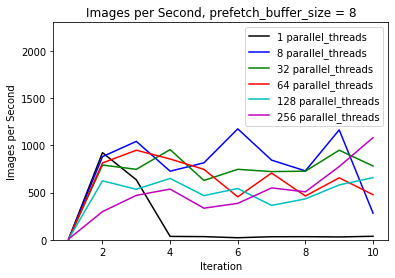

In [25]:
#plot images per second when parallel_threads are changed.
import matplotlib.pyplot as plt
from numpy import loadtxt

data = loadtxt(output_files_to_plot_parallel_threads[0][0], dtype='float', skiprows=1)
iteration = data[:,0]
loss = data[:,1]
acc = data[:,2]
images_per_second = data[:,3]

colors = ['k','b','g','r','c','m','y']

fig, images_per_second_ax = plt.subplots()
images_per_second_ax.set_xlabel('Iteration')
images_per_second_ax.set_ylabel('Images per Second',color = 'Black')
images_per_second_ax.plot(iteration,images_per_second, color = 'Black', label=output_files_to_plot_parallel_threads[0][1])
images_per_second_ax.tick_params(axis='y', labelcolor='Black')

for i in range(len(output_files_to_plot_parallel_threads)-1):
    data = loadtxt(output_files_to_plot_parallel_threads[i+1][0], dtype='float', skiprows=1)
    iteration = data[:,0]
    loss = data[:,1]
    acc = data[:,2]
    images_per_second = data[:,3]
    images_per_second_ax.plot(iteration,images_per_second, color = colors[i+1], label=output_files_to_plot_parallel_threads[i+1][1])

plt.title('Images per Second, prefetch_buffer_size = 8')    
images_per_second_ax.legend(loc="upper right")
plt.ylim(0,2300)
#plt.yscale("log")
#acc_ax = loss_ax.twinx()
#acc_ax.set_ylabel('Accuracy',color = 'Black')
#acc_ax.plot(iteration,acc,color='Black')
#acc_ax.tick_params(axis='y', labelcolor='Black')


(0.0, 1300.0)

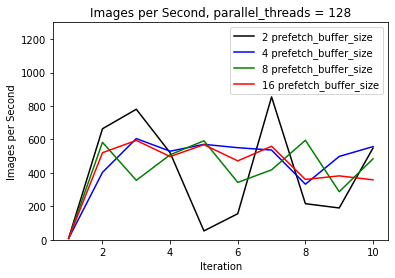

In [21]:
#plot images per second when prefetch_buffer_size is changed.
import matplotlib.pyplot as plt
from numpy import loadtxt

data = loadtxt(output_files_to_plot_prefetch_buffer_size[0][0], dtype='float', skiprows=1)
iteration = data[:,0]
loss = data[:,1]
acc = data[:,2]
images_per_second = data[:,3]

colors = ['k','b','g','r','c','m','y']

fig, images_per_second_ax = plt.subplots()
images_per_second_ax.set_xlabel('Iteration')
images_per_second_ax.set_ylabel('Images per Second',color = 'Black')
images_per_second_ax.plot(iteration,images_per_second, color = 'Black', 
                          label=output_files_to_plot_prefetch_buffer_size[0][1])
images_per_second_ax.tick_params(axis='y', labelcolor='Black')

for i in range(len(output_files_to_plot_prefetch_buffer_size)-1):
    data = loadtxt(output_files_to_plot_prefetch_buffer_size[i+1][0], dtype='float', skiprows=1)
    iteration = data[:,0]
    loss = data[:,1]
    acc = data[:,2]
    images_per_second = data[:,3]
    images_per_second_ax.plot(iteration,images_per_second, color = colors[i+1], 
                              label=output_files_to_plot_prefetch_buffer_size[i+1][1])

plt.title('Images per Second, parallel_threads = 128')    
images_per_second_ax.legend(loc="upper right")
plt.ylim(0,1300)
#plt.yscale("log")
#acc_ax = loss_ax.twinx()
#acc_ax.set_ylabel('Accuracy',color = 'Black')
#acc_ax.plot(iteration,acc,color='Black')
#acc_ax.tick_params(axis='y', labelcolor='Black')
